<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML3_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.	Perform logistic regression to classify if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Utilize gradient descent with regularization for hyper-parameter tuning. Also, generate log-loss curve for this problem.
Dataset: samples_cancer.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/samples_cancer.csv")
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors="coerce")
df.dropna(inplace=True)

In [ ]:
label_encoders = {}
for col in ['Class']:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Convert category labels
    label_encoders[col]=encoder

In [ ]:
feature_df=df[df.columns[0:-1]]
X=np.asarray(feature_df)
y=np.asarray(df[df.columns[-1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [ ]:
print("Classes after encoding:", encoder.classes_)

Classes after encoding: [2 4]


In [ ]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", np.round(accuracy * 100, 2), "%")

Logistic Regression Accuracy: 65.69 %


In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        90
           1       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
features = [[1000025, 5,  1,  1,  1,  2,  1,  3, 1, 1]]
predicted_category = lr.predict(features)
print("Predicted tumor for a patient:", label_encoders["Class"].inverse_transform(predicted_category))

Predicted tumor for a patient: [2]


In [ ]:
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)

train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Testing Log Loss: {test_log_loss:.4f}")

Training Log Loss: 0.6432
Testing Log Loss: 0.6307


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_train_prob_pos = y_train_prob[:, 1] if y_train_prob.ndim > 1 else y_train_prob
y_test_prob_pos = y_test_prob[:, 1] if y_test_prob.ndim > 1 else y_test_prob

In [ ]:
# Function to calculate log-loss
def compute_log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# Store log-loss at each iteration during training
train_log_loss = []
test_log_loss = []

for i in range(1, 1001):  # Replace 1000 with your actual number of iterations
    # Calculate the log-loss for training and test set at each iteration
    train_log_loss.append(compute_log_loss(y_train, y_train_prob_pos))
    test_log_loss.append(compute_log_loss(y_test, y_test_prob_pos))

In [ ]:
    # Update your model parameters here for each iteration (this part depends on your implementation)

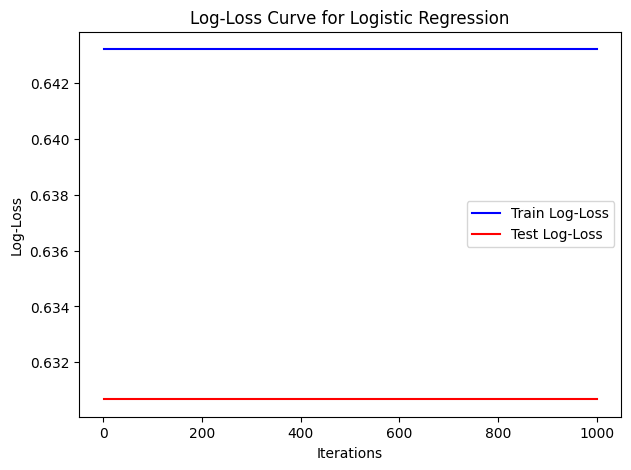

In [ ]:
# Plotting Log-Loss Curve
epochs = np.arange(1, len(train_log_loss) + 1)
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_log_loss, label="Train Log-Loss", color="blue")
plt.plot(epochs, test_log_loss, label="Test Log-Loss", color="red")
plt.xlabel("Iterations")
plt.ylabel("Log-Loss")
plt.title("Log-Loss Curve for Logistic Regression")
plt.legend()
plt.show()